<a href="https://colab.research.google.com/github/alangkim/fchollet/blob/main/Team_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final-term team quiz on AI for Deep Learning

- Name:  
- ID Number: 

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [1]:
import tensorflow as tf
tf.keras.__version__

'2.8.0'

In [2]:
from tensorflow import keras

## Q1 Use Mnist data


In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [28]:
x_test[:10]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

(Q1-1) [20] Create a CNN model with the structure shown in the figure below. 

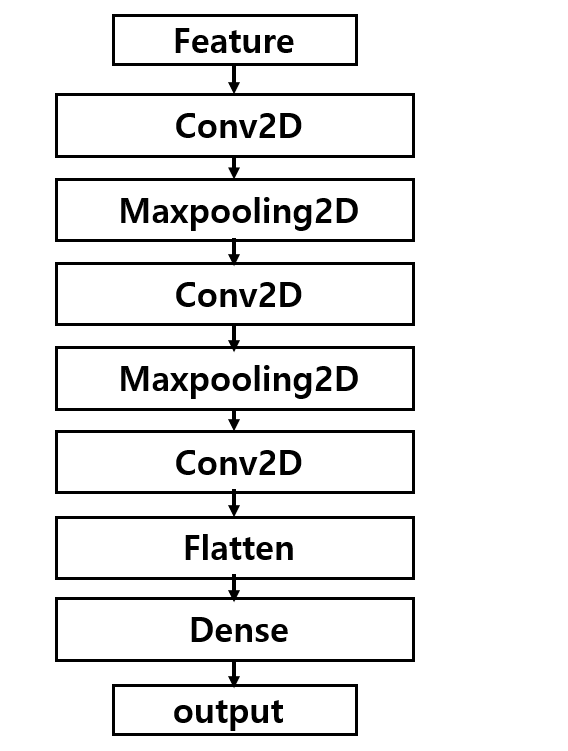

- Set filter size of Convolution layers as 16, 32, and 32.
- Set kernel size of Convolution layer as (3,3), use zero padding, and use stride as 1 for all convolution layers. 
- Use 'relu' activation for all convolution layers. 
- Use 2 by 2 Maxpooling with stride 2.
- Set the number of filters in the dense layer after the flatten layer as 50, and use the 'relu' function for activation.


In [47]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=16, kernel_size=3, strides = 1, activation="relu", padding = 'same')(inputs)
x = layers.MaxPooling2D(pool_size=2, strides = 2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides = 1, activation="relu", padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2, strides = 2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides = 1, activation="relu", padding = 'same')(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='relu')(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 32)          924

(Q1-2) [20] Compile and fit your model
 - Use Adam optimizer
 - Use categorical cross entropy loss
 - Use accuracy as for the evaluation metric
 - Use epoch as 5 and batch size as 32

In [49]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(x_train, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1520 - accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0493 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0219 - accuracy: 0.9926


(Q1-3) [20] Try Data augmentation for training 

- Apply RandomFlip (horizontal flip) and RandomRotation. 


In [57]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

inputs = keras.Input(shape=(28, 28, 1))
x = data_augmentation(inputs)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='relu')(x)

outputs = layers.Dense(10, activation='softmax')(x)
model_aug = keras.Model(inputs = inputs, outputs=outputs)

model_aug.compile(optimizer='adam',
              loss='',
              metrics=['accuracy'])

#history = model_aug.fit(x_train, train_labels, epochs=5, batch_size=32)

## Q2 Use Jena climate data

In [3]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-06-09 01:35:38--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  18.6MB/s    in 0.7s    

2022-06-09 01:35:40 (18.6 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [4]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

ploting temperature

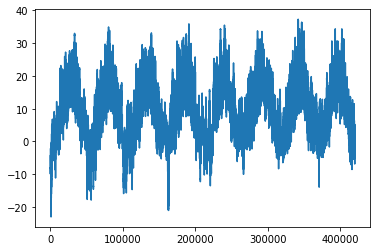

In [5]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

(Q2-1) [20] Visualize first 7 days of temperature

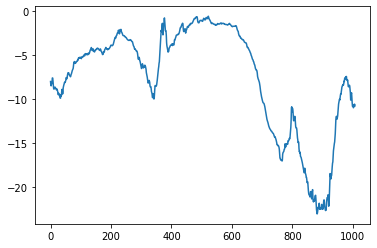

In [6]:
plt.plot(range(1008), temperature[:1008])

Computing the number of samples we'll use for each data split

In [7]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


Normalizing data

In [8]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

Data preprocessing.

In [9]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [10]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


common sense baseline

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


(Q2-2) [20] Modify the code below to perform Bidirectional LSTM using 16 filters. Add dropout layer with dropout probability 0.5.   


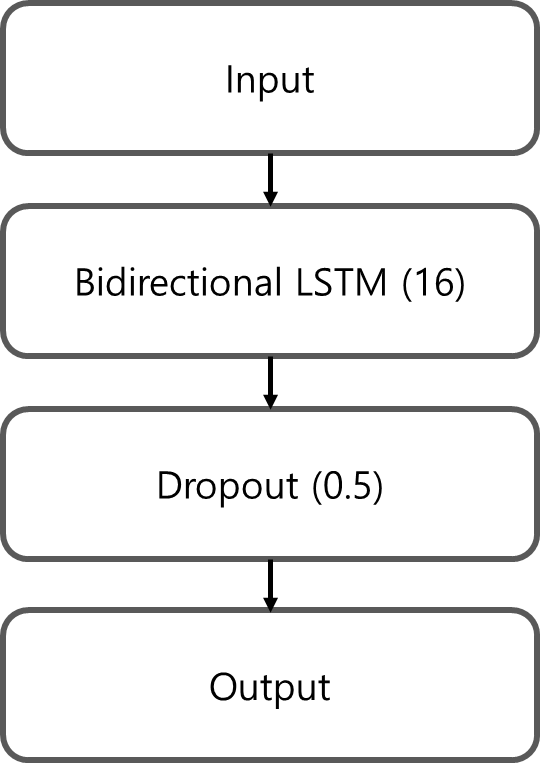 

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=3,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/3
819/819 [==============================] - 58s 60ms/step - loss: 34.0221 - mae: 4.2924 - val_loss: 11.4882 - val_mae: 2.6222
Epoch 2/3
819/819 [==============================] - 51s 63ms/step - loss: 15.1884 - mae: 3.0314 - val_loss: 10.6589 - val_mae: 2.5419
Epoch 3/3
405/405 [==============================] - 16s 37ms/step - loss: 11.0026 - mae: 2.6184
Test MAE: 2.62


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               3968      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________
